In [13]:
# Multivariate adaptive regression splines
import numpy as np
from pyearth import Earth
from matplotlib import pyplot

In [14]:
#Create some fake data
np.random.seed(0)
m = 1000
n = 10
x = 80*numpy.random.uniform(size=(m,n)) - 40
y = numpy.abs(x[:,6] - 4.0) + 1*numpy.random.normal(size=m)

In [16]:
#Define a simple range of values for x and reshape so sklearn likes it.,
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

In [17]:
#Fit an Earth model
model = Earth()
model.fit(x,y)

#Print the model
print(model.trace())
print(model.summary())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.194660  1      0.197  0.000  0.000  
1     0       0    27    0.069444  3      0.074  0.643  0.625  
2     0       0    68    0.056312  5      0.063  0.711  0.679  
3     0       0    155   0.030608  7      0.036  0.843  0.816  
4     0       0    123   0.017937  9      0.022  0.908  0.886  
5     0       0    158   0.015146  11     0.020  0.922  0.898  
6     0       0    36    0.012851  13     0.018  0.934  0.908  
7     0       0    96    0.011229  15     0.017  0.942  0.915  
8     0       0    188   0.010600  17     0.017  0.946  0.915  
9     0       0    -1    0.010600  18     0.017  0.946  0.912  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
---------------------------

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Text(0.5,1,'Simple Earth Example')

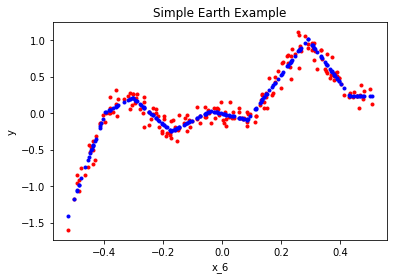

In [24]:
#Plot the model
y_hat = model.predict(x)
pyplot.figure()
pyplot.plot(x,y,'r.')
pyplot.plot(x,y_hat,'b.')
pyplot.xlabel('x_6')
pyplot.ylabel('y')
pyplot.title('Simple Earth Example')
# pyplot.show()